This notebook will mainly be used for the IBM Coursera Capstone Project

In [1]:
import pandas as pd
import numpy as np

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [3]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# Business Understanding: 
Using Machine learning techniques, we can predict a severe accident event by creating a model that factors in data from past accidents. In this model, we are given uncontrollable accident factors and the result of the model will be the severity of the accident based on the different values of the factors. The main stakeholders in this project are emergency first responders and the police force since they would benefit by being able to efficiently assign a certain number of personnel at a time when there may be a large number of severe accidents. Also, they can warn drivers of a high probability of a severe accident in attempt to avoid them. Another large stakeholder would be insurance companies because they would be able to predict severe accident events in the future and use this data to manipulate insurance rates.   

# Data:
The data used in this model is from collisions provided by SPD and recorded by Traffic Records in Seattle from 2004 to present. The data contains past accidents and codes each accident from 0 to 3 based on the severity of the injury. After inspecting the contents in the SEVERITYCODE column, it is apparent that there are only severity codes 1 and 2 present in the data. In order to focus on the main factors that contribute to severe accidents, we can narrow down the columns to only vital information that we can then manipulate. Using the value_counts function, we can see that there are significantly more code 1 accident severities compared to level 2 severities. After sweeping the data from null values, we can balance the data and then analyze it. The independent variables in this model are the weather, road conditions, and the light conditions. The dependend variable is the severity code (1 or 2). The end result should predict a high probability of a code 2 severity based on the 3 conditions given in the model.

# Preprocessing:

In [4]:
df1.drop(["X","Y","INCKEY","COLDETKEY","INTKEY","EXCEPTRSNCODE","EXCEPTRSNDESC","SEVERITYDESC","PERSONCOUNT","PEDCOUNT","PEDCYLCOUNT","INCDATE","INCDTTM","JUNCTIONTYPE","SDOT_COLCODE","SDOT_COLDESC","INATTENTIONIND","UNDERINFL","ST_COLCODE","ST_COLDESC","SEGLANEKEY","CROSSWALKKEY","REPORTNO","STATUS","ADDRTYPE","COLLISIONTYPE","VEHCOUNT","PEDROWNOTGRNT","SDOTCOLNUM","SPEEDING","HITPARKEDCAR"], axis=1, inplace=True)
df1.head()

,SEVERITYCODE,OBJECTID,LOCATION,SEVERITYCODE.1,WEATHER,ROADCOND,LIGHTCOND
0,2,1,5TH AVE NE AND NE 103RD ST,2,Overcast,Wet,Daylight
1,1,2,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,Raining,Wet,Dark - Street Lights On
2,1,3,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,Overcast,Dry,Daylight
3,1,4,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Clear,Dry,Daylight
4,2,5,SWIFT AVE S AND SWIFT AV OFF RP,2,Raining,Wet,Daylight


In [5]:
df1['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [6]:
df1['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [7]:
df1['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [8]:
df1['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [9]:
df1['LOCATION'].value_counts()
df1.drop(["LOCATION","SEVERITYCODE.1","OBJECTID"], axis=1, inplace=True)

In [10]:
df1.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [11]:
df1.dtypes

SEVERITYCODE     int64
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

In [12]:
df1["WEATHER"].replace("Unknown",np.nan,inplace=True)
df1["ROADCOND"].replace("Unknown",np.nan,inplace=True)
df1["LIGHTCOND"].replace("Unknown",np.nan,inplace=True)

In [13]:
missing_data=df1.isnull()
missing_data.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [14]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

WEATHER
False    174501
True      20172
Name: WEATHER, dtype: int64

ROADCOND
False    174583
True      20090
Name: ROADCOND, dtype: int64

LIGHTCOND
False    176030
True      18643
Name: LIGHTCOND, dtype: int64



In [15]:
# drop whole rows with Nan values
df1.dropna(subset=["WEATHER","ROADCOND","LIGHTCOND"], axis=0, inplace=True)

df1.reset_index(drop=True, inplace=True)
df1.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [16]:
from sklearn import preprocessing
le_weather = preprocessing.LabelEncoder()
le_weather.fit(['Clear','Raining','Overcast','Snowing','Fog/Smog/Smoke','Other','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'])
df1["WEATHER"] = le_weather.transform(df1["WEATHER"]) 


le_roadcond = preprocessing.LabelEncoder()
le_roadcond.fit([ 'Dry', 'Wet', 'Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'])
df1["ROADCOND"] = le_roadcond.transform(df1["ROADCOND"])


le_lightcond = preprocessing.LabelEncoder()
le_lightcond.fit([ 'Daylight', 'Dark - Street Lights On', 'Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'])
df1["LIGHTCOND"] = le_lightcond.transform(df1["LIGHTCOND"])

df1.head()


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,4,7,5
1,1,6,7,2
2,1,4,0,5
3,1,1,0,5
4,2,6,7,5


In [17]:
from sklearn.utils import resample
df_majority = df1[df1['SEVERITYCODE']==1]
df_minority = df1[df1['SEVERITYCODE']==2]

df1_majority_downsampled = resample(df_majority, replace=False, n_samples=58188, random_state=1)

In [18]:
df1 = pd.concat([df1_majority_downsampled, df_minority])
df1["SEVERITYCODE"].value_counts()

1    58188
2    55851
Name: SEVERITYCODE, dtype: int64

# Machine Learning Model
## KNN 

In [19]:
X = df1[['WEATHER','ROADCOND','LIGHTCOND']].values
X[0:5]

array([[6, 7, 5],
       [1, 0, 5],
       [1, 0, 2],
       [9, 5, 2],
       [6, 7, 5]])

In [20]:
y = df1[['SEVERITYCODE']].values
y[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [21]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.67984114,  1.61342456,  0.59582671],
       [-0.71163651, -0.62626824,  0.59582671],
       [-0.71163651, -0.62626824, -1.49883954],
       [ 3.11472773,  0.97351233, -1.49883954],
       [ 1.67984114,  1.61342456,  0.59582671]])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (91231, 3) (91231, 1)
Test set: (22808, 3) (22808, 1)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [24]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_knn=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_knn)

    
    std_acc[n-1]=np.std(yhat_knn==y_test)/np.sqrt(yhat_knn.shape[0])

mean_acc

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/_

array([0.50811119, 0.51205717, 0.50806734, 0.51201333, 0.51179411,
       0.51385479, 0.50863732, 0.5110926 , 0.50789197])

In [25]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

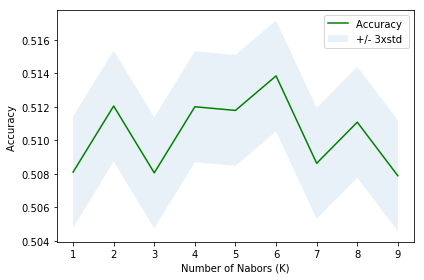

In [26]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [27]:
print( "The best accuracy is", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy is 0.5138547877937566 with k= 6


In [28]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

jaccard_knn = jaccard_similarity_score(y_test, yhat_knn)
f1_score_knn = f1_score(y_test, yhat_knn, average ='weighted')

## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
SeverityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
SeverityTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
SeverityTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
predTree = SeverityTree.predict(X_test)

In [33]:
print (predTree [0:5])
print (y_test [0:5])

[2 1 1 2 2]
[[2]
 [2]
 [2]
 [1]
 [1]]


In [34]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.5097772711329358


In [35]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge
    python_abi:      3.6-1_cp36m        conda-forge

The following packages will be UPDATED:

 

In [45]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image

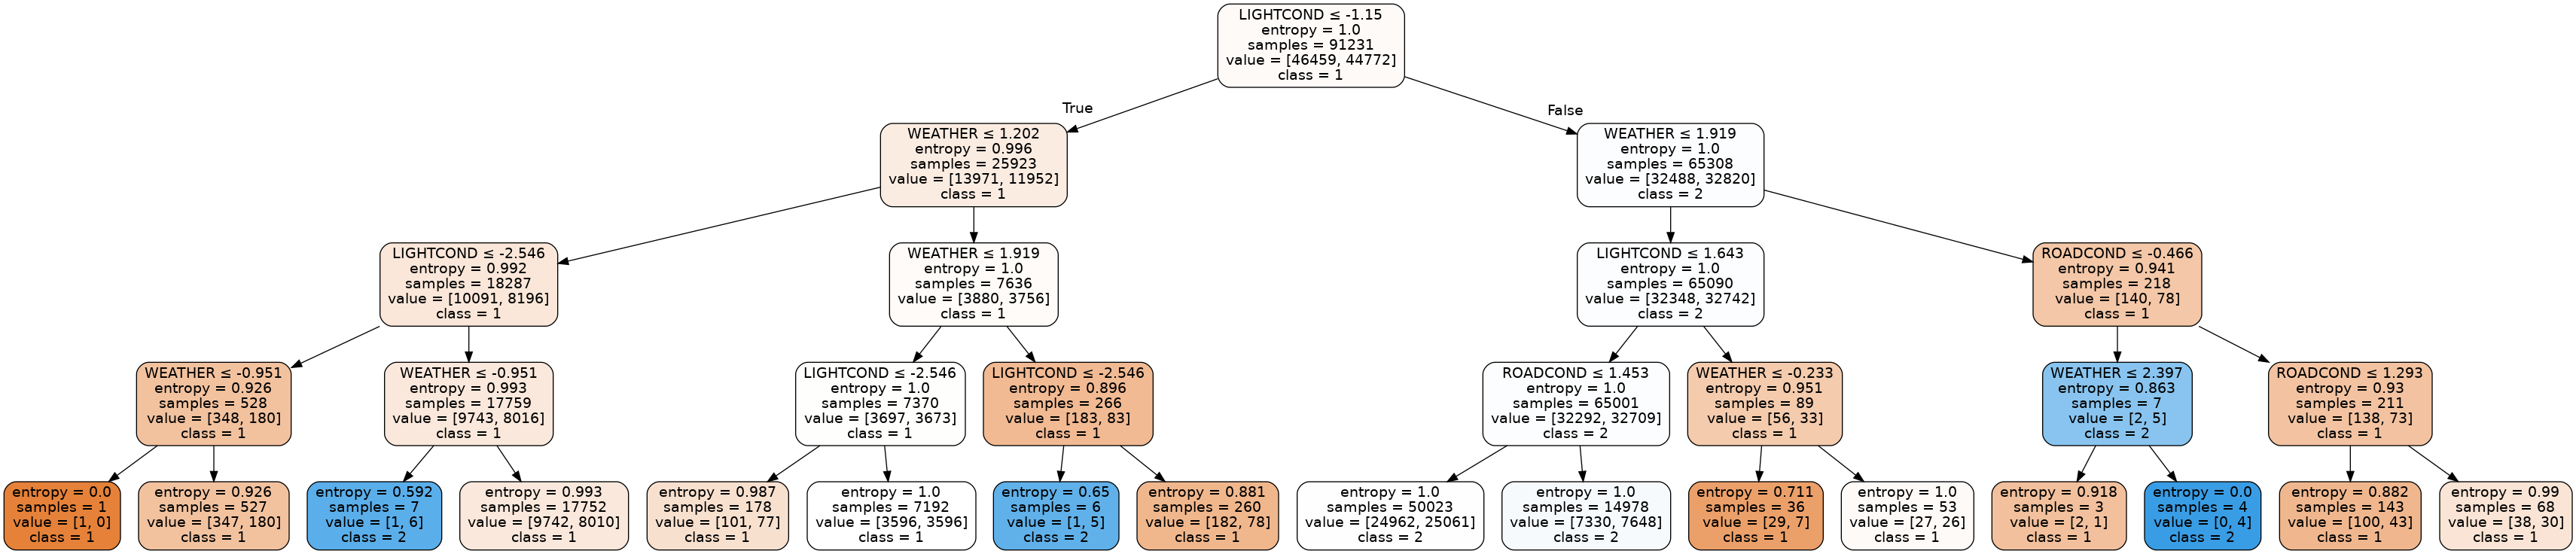

In [46]:
dot_data = StringIO()
featureNames = df1.columns[1:4]
export_graphviz(SeverityTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = featureNames,class_names=['1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('SeverityTree.png')
Image(graph.create_png())

In [38]:
jaccard_dt = jaccard_similarity_score(y_test, predTree)
f1_score_dt = f1_score(y_test, predTree, average='weighted')

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
yhat_lr = LR.predict(X_test)
yhat_lr

array([1, 1, 1, ..., 1, 1, 1])

In [41]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.50662404, 0.49337596],
       [0.5429492 , 0.4570508 ],
       [0.5399826 , 0.4600174 ],
       ...,
       [0.52986465, 0.47013535],
       [0.50069729, 0.49930271],
       [0.5429492 , 0.4570508 ]])

In [42]:
from sklearn.metrics import log_loss
f1_score_log = f1_score(y_test, yhat_lr, average='weighted') 
jaccard_log = jaccard_similarity_score(y_test, yhat_lr)
logloss = log_loss(y_test, yhat_prob)

## Evaluation

In [43]:
print('Logloss:',logloss)
print('LogisticRegression Jaccard:',jaccard_log)
print('LogisticRegression F1-score', f1_score_log)
print('KNN Jaccard:',jaccard_knn)
print('KNN F1-score',f1_score_knn)
print('Decision Tree Jaccard:',jaccard_dt)
print('Decision Tree F1-score',f1_score_dt)


Logloss: 0.6920980685853464
LogisticRegression Jaccard: 0.5140740091196071
LogisticRegression F1-score 0.4605840856665628
KNN Jaccard: 0.5078919677306208
KNN F1-score 0.4741709790822531
Decision Tree Jaccard: 0.5097772711329358
Decision Tree F1-score 0.48684556950194374


In [47]:
columns = ['KNN', 'Decision Tree', 'Logistic Regression']
index = ['Jaccard', 'F1-score', 'Logloss']
f1list = [f1_score_knn, f1_score_dt, f1_score_log]
jaccardlist = [jaccard_knn, jaccard_dt, jaccard_log]
loglosslist = ["NA", "NA", logloss]

In [49]:
accuracy_df = pd.DataFrame([jaccardlist, f1list, loglosslist], index = index, columns = columns)

In [50]:
accuracy_df1 = accuracy_df.transpose()
accuracy_df1.columns.name = 'Algorithm'
accuracy_df1

Algorithm,Jaccard,F1-score,Logloss
KNN,0.507892,0.474171,NA
Decision Tree,0.509777,0.486846,NA
Logistic Regression,0.514074,0.460584,0.692098


## Conclusion